# Breast Cancer Classification 

## Overview

In this project, I will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this project are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This project relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

## 1. Load data, visualise it and identify erroneous values

 - Load the data from the csv file `BreastCancerData.csv` (found on GitHub repository).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this project, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

#### Load the dataset

In [ ]:
data_path = "project2_data_2024.csv"
cancer = pd.read_csv(data_path)

# Take a quick look at the data structure
cancer

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,benign,13.618925155145831,17.270102,88.166812,593.279565,0.096065,0.094450,0.058880,0.036769,0.173312,...,0.313583,1.029905,2.217009,28.819166,0.006705,0.020034,0.023273,0.010344,0.017835,0.002852
216,benign,14.048463765049336,17.186671,90.974271,637.474225,0.094969,0.091549,0.063532,0.039494,0.173324,...,0.355219,1.068919,2.481640,33.861241,0.006128,0.020611,0.023855,0.010420,0.021327,0.003268
217,benign,12.879033083352171,16.767790,83.123369,539.225356,0.092146,0.083986,0.059347,0.035404,0.167690,...,0.314989,1.198787,2.230067,28.250520,0.005713,0.021280,0.024134,0.010947,0.024180,0.003778
218,benign,14.411990515442902,18.970674,93.423809,671.128126,0.086304,0.090118,0.070882,0.039482,0.175789,...,0.356964,1.030049,2.560170,35.435273,0.005784,0.022279,0.025244,0.009990,NaN,0.003255


#### Extract the feature names and label names

In [3]:
# Extract feature names
feature_names = cancer.columns[1:].tolist()

# Extract label (target) name
label_name = cancer.columns[0]

# Print out the feature names and label name
print("Feature Names:", feature_names)
print("Label Name:", label_name)

Feature Names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
Label Name: label


#### Look at the dataset and do some necessary tranformation

In [4]:
# check NA
missing_values = cancer.isnull().sum()
print(missing_values)

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64


In [5]:
# check data type
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [6]:
# the categorical attributes:
print(cancer["label"].value_counts())

# fix the input error
cancer.loc[cancer['label'] == 'maligant', 'label'] = "malignant"

print(cancer["label"].value_counts())

label
benign       154
malignant     65
maligant       1
Name: count, dtype: int64
label
benign       154
malignant     66
Name: count, dtype: int64


In [7]:
# convert label to a numerical format: 'benign'(negative case) is 0 and 'malignant'(positive case) is 1
cancer['label'] = cancer['label'].map({'benign': 0, 'malignant': 1})
print(cancer["label"].value_counts())

label
0    154
1     66
Name: count, dtype: int64


In [8]:
# check if 'mean radius' is numeric
non_numeric_rows = []

for index, row in cancer.iterrows():
    try:
        float(row['mean radius'])
    except ValueError:
        non_numeric_rows.append((index, row['label'], row['mean radius']))

print("Rows with non-numeric 'mean radius' values:")
print(non_numeric_rows)

Rows with non-numeric 'mean radius' values:
[(61, 0, 'n12.254518716420597')]


In [9]:
# I think it's an error, convert it to NA
cancer.loc[61, 'mean radius'] = np.nan
# check if convert successfully
print(any(cancer['mean radius'] == 'n12.254518716420597'))

False


In [10]:
# then convert 'mean radius' to float
cancer['mean radius'] = cancer['mean radius'].astype(float)

# check data type
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    int64  
 1   mean radius              219 non-null    float64
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

#### Provide text summaries of the dataset

In [11]:
# make sure display all predictors information
pd.set_option('display.max_columns', None)
cancer.describe()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,219.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,0.300000,13.693313,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,0.459303,2.176062,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,0.000000,-14.292182,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,0.000000,13.092060,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,0.000000,13.647143,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,1.000000,14.272883,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,1.000000,18.200299,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


#### Identify any erroneous values
From the summary, I find 2 negative values and 4 abnormal max values. It may have other erroneous values, let's check by sorting each feature.

In [12]:
for feature in feature_names:
    sorted_values = cancer[['label', feature]].sort_values(by=feature, ascending=False) # Sort in descending order
    
    print(sorted_values)
    print("\n")

     label  mean radius
82       1    18.200299
23       1    16.733127
4        1    16.416060
95       1    16.403146
78       1    16.392591
..     ...          ...
63       0    12.046249
46       0    12.002338
101      0    11.560025
130      0   -14.292182
61       0          NaN

[220 rows x 2 columns]


     label  mean texture
179      0     24.430831
182      0     22.384166
15       1     22.347206
178      0     22.099859
83       1     21.972650
..     ...           ...
116      0     16.453622
115      0     16.359018
76       0     16.011376
0        1     15.902542
145      0     15.349270

[220 rows x 2 columns]


     label  mean perimeter
82       1      121.247839
78       1      111.246670
23       1      108.712580
83       1      108.186847
4        1      107.857386
..     ...             ...
134      0       78.441589
63       0       78.221997
150      0       77.660607
46       0       77.497116
101      0       74.690886

[220 rows x 2 columns]


     label

In [13]:
# Find a nagative value in 'mean radius', I think it's an error, convert it to NA
cancer.loc[130, 'mean radius'] = np.nan
cancer.loc[130, 'mean radius']

nan

In [14]:
# Find a nagative value in 'mean area', I think it's an error, convert it to NA
cancer.loc[177, 'mean area'] = np.nan
cancer.loc[177, 'mean area']

nan

In [15]:
# Max value in 'mean fractal dimension' is much higher than 75% value
# I think it's an outlier or an error, convert it to NA
cancer.loc[63, 'mean fractal dimension'] = np.nan
cancer.loc[63, 'mean fractal dimension']

nan

In [16]:
# In 'texture error', 2.561348 for benign(0) is much higher than maligant(1).
# I think it's a little bit strange but not sure, need more information. So keep them.

# Max value in 'area error' is much higher than 75% value. But after sorting, It looks good.

# Max value in 'concavity error' is much higher than 75% value. After sorting, 0.163592 and 0.131724 are strange.
# They are twice as much as other outliers. But I'm not sure, need more information, so keep them.

# Max value in 'fractal dimension error' is much higher than 75% value. But after sorting, It looks good.

# Other features look good.

In [17]:
# recheck NA
missing_values = cancer.isnull().sum()
print(missing_values)

label                      0
mean radius                2
mean texture               0
mean perimeter             0
mean area                  1
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     1
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64


In [18]:
# recheck the summary
cancer.describe()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,218.000000,220.000000,220.000000,219.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,0.300000,13.821687,18.991963,89.866240,623.803723,0.096480,0.102879,0.085281,0.046867,0.181850,0.063035,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,0.459303,1.063649,1.427635,7.366180,97.903752,0.004961,0.019819,0.026911,0.012548,0.010816,0.002761,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,0.000000,11.560025,15.349270,74.690886,477.371592,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,0.000000,13.105327,17.914319,84.911981,559.838030,0.092797,0.089531,0.066525,0.038106,0.174944,0.061133,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,0.000000,13.654830,18.928256,88.587737,604.596268,0.096457,0.098517,0.075748,0.042761,0.180953,0.062525,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,1.000000,14.277530,19.995859,93.066393,655.885812,0.099817,0.113276,0.098826,0.055337,0.186354,0.064110,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,1.000000,18.200299,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,0.076091,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


In [19]:
# back to default setting
pd.reset_option('display.max_columns')

#### Create one graphical plot per feature
1. Histogram for the first 12 features (show the frequency)

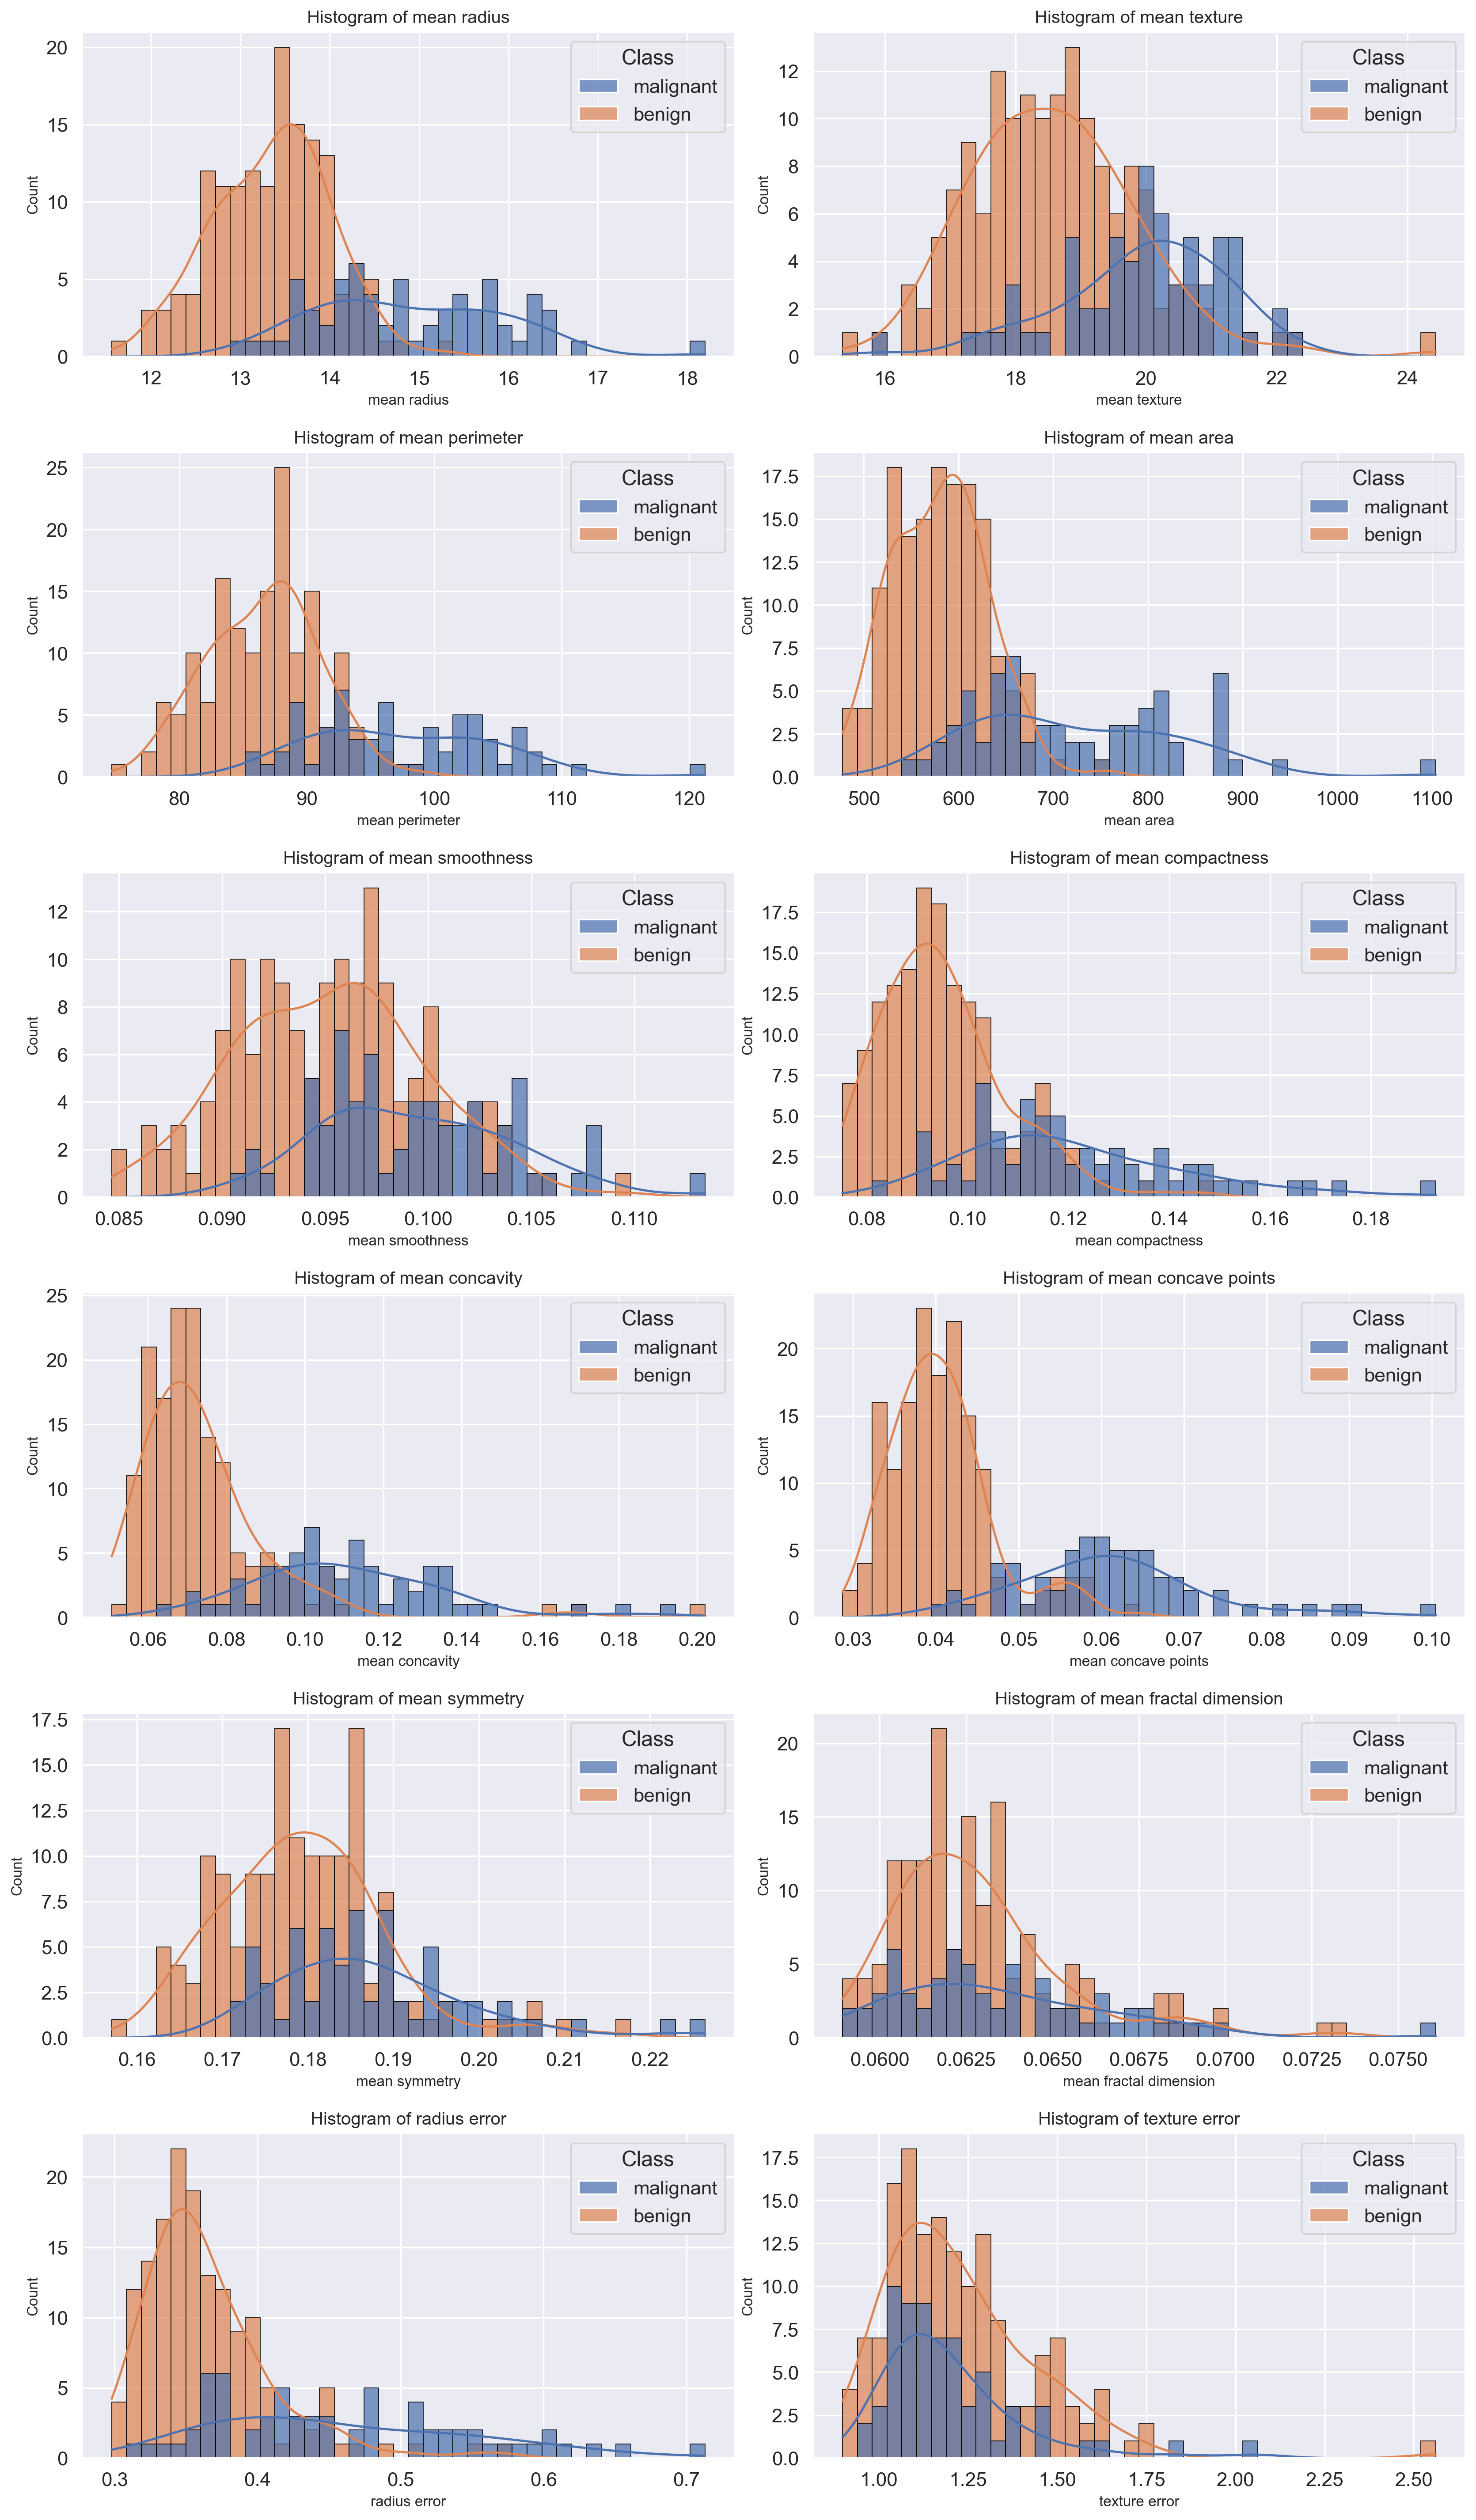

In [20]:
# Show the string labels for better understanding
label_mapping = {0: 'benign', 1: 'malignant'}
cancer['Class'] = cancer['label'].map(label_mapping)

# Set seaborn global style and font scale
sns.set(font_scale=1.2)

# Define the number of rows and columns for subplots
nrows_hist = (12 + 1) // 2 # 12 features, 2 per row
fig, axs = plt.subplots(nrows=nrows_hist, ncols=2, figsize=(14, 4 * nrows_hist)) 
axs = axs.flatten()

# Plot histograms for the first 12 features
for i, feature in enumerate(feature_names[:12]):
    sns.histplot(data=cancer, x=feature, hue='Class', multiple='layer', bins=40, kde = True, alpha=0.7, ax=axs[i])
    for patch in axs[i].patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)
    axs[i].set_title(f'Histogram of {feature}', fontsize=12)
    axs[i].set_xlabel(feature, fontsize=10)
    axs[i].set_ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

2.  Boxplots for the 13th to 20th features (show the data distribution for 2 classes)

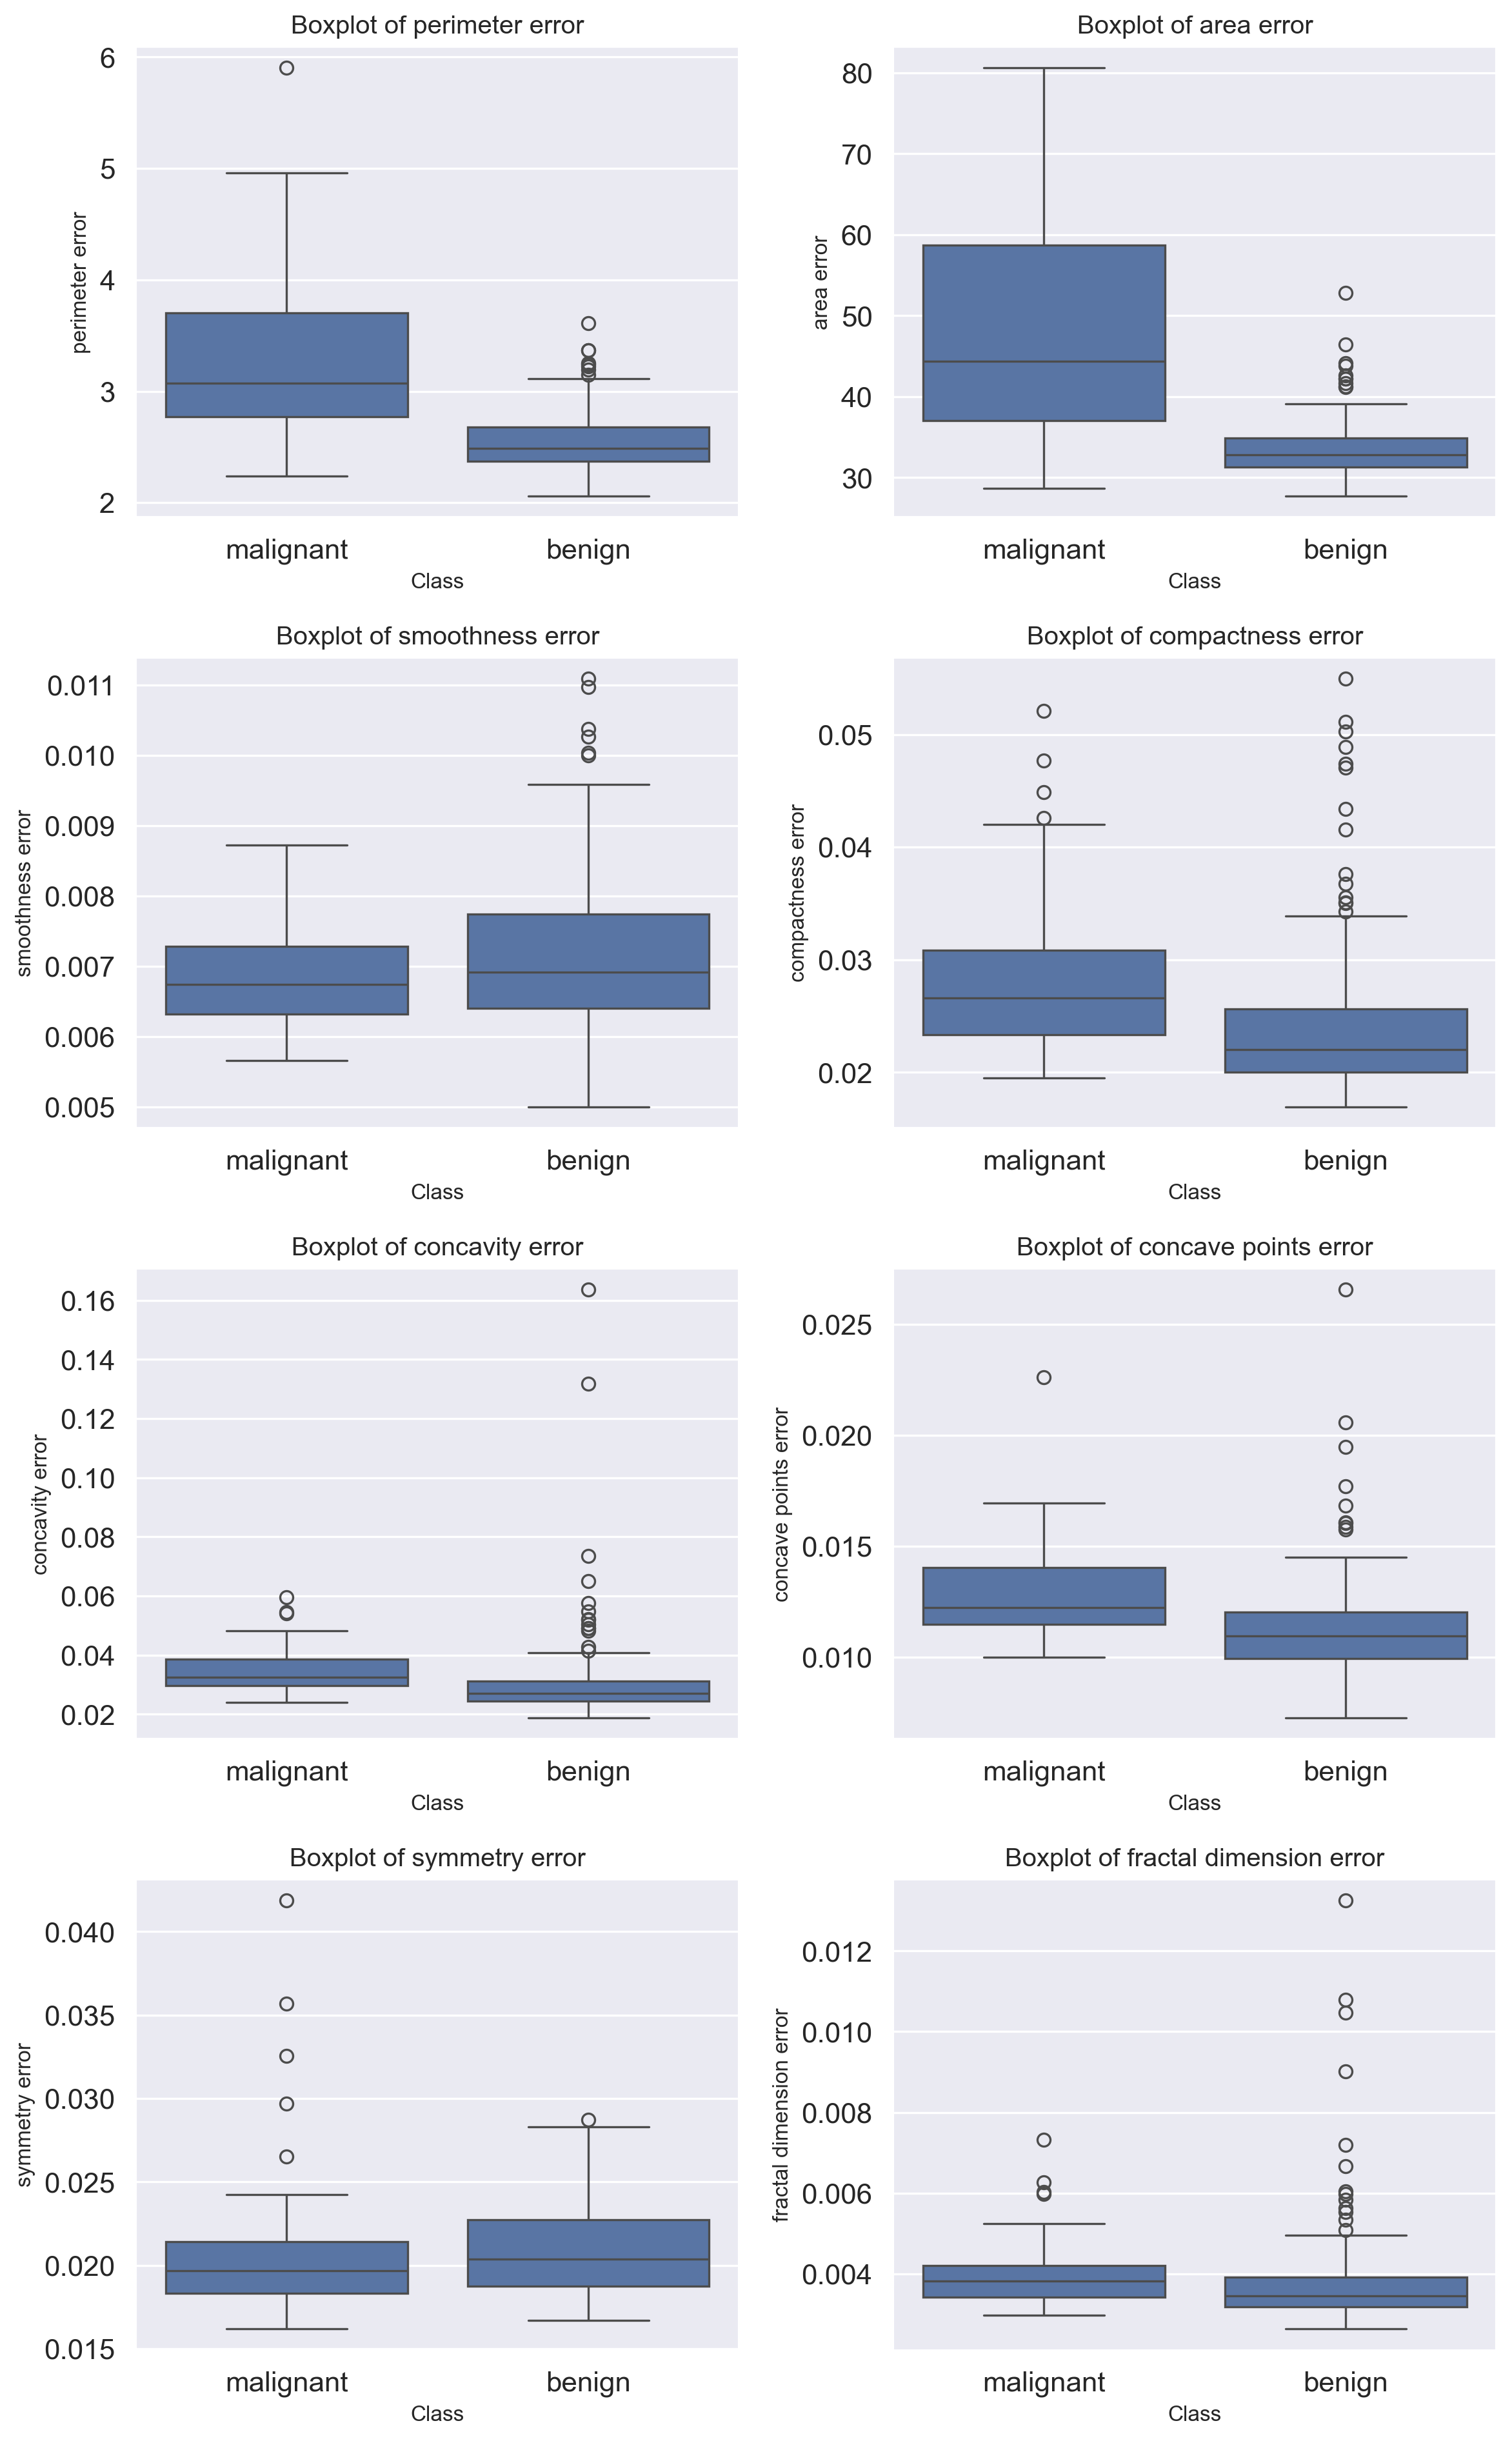

In [21]:
# Show the string labels for better understanding
label_mapping = {0: 'benign', 1: 'malignant'}
cancer['class'] = cancer['label'].map(label_mapping)

# Set seaborn global style and font scale
sns.set(font_scale=1.2)

# Define the number of rows and columns for subplots
nrows_box = (8 + 1) // 2  # 4 features, 2 per row
fig, axs = plt.subplots(nrows=nrows_box, ncols=2, figsize=(10, 4 * nrows_box)) 
axs = axs.flatten()

# Plot boxplots for features 13 to 16
for i, feature in enumerate(feature_names[12:]):
    sns.boxplot(x='class', y=feature, data=cancer, ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}', fontsize=12)
    axs[i].set_xlabel('Class', fontsize=10)
    axs[i].set_ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

All features look good from the plot, so no need for more data cleaning.

## 2. Prepare data and models

#### Split data

In [23]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, fbeta_score, make_scorer, roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Split data into X and y
X = cancer[feature_names]
y = cancer[label_name]

# Split data into training and test sets using stratify option
# As I choose the cross validation, there is no need to split the validation set 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=27)


# Check the proportion of the classes in each partition
print(np.mean(y_train_full),np.mean(y_test))

0.30113636363636365 0.29545454545454547


#### Pre-processing

In [24]:
# Create a numerical variable pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # replace NA value by median
    ('std_scaler', StandardScaler())  # standardise the data
])

# Create full preprocessing pipeline, only apply to the features, not to the target variable.
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, feature_names)
])


#### Implement a very simple random baseline model

In [25]:
from sklearn.base import BaseEstimator, ClassifierMixin

class RandomGuessClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        return self
    
    def predict(self, X):
        np.random.seed(33)
        return np.random.choice(self.classes_, size=len(X))
    
random_guess_clf = RandomGuessClassifier()

# Define the common StratifiedKFold cross-validator for all models as our dataset is small
# Use a same cross validation method for evaluate all models performance to keep the consistency
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)

# Use the same cross validation for all models to keep the consistency
# Use the cross validation for random baseline model
y_pred_random_cv = cross_val_predict(random_guess_clf, X_train_full, y_train_full, cv=skf)


#### Display the random baseline model's performance metrics and confusion matrix

In [26]:
from sklearn.metrics import fbeta_score

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

# Measure the baseline performance with the following metrics
accuracy_baseline_cv = accuracy_score(y_train_full, y_pred_random_cv)
balanced_accuracy_baseline_cv = balanced_accuracy_score(y_train_full, y_pred_random_cv)
recall_baseline_cv = recall_score(y_train_full, y_pred_random_cv, pos_label=1)
precision_baseline_cv = precision_score(y_train_full, y_pred_random_cv, pos_label=1)
auc_baseline_cv = roc_auc_score(y_train_full, y_pred_random_cv)
f1_baseline_cv = f1_score(y_train_full, y_pred_random_cv, pos_label=1)
f10_baseline_cv = f10_score(y_train_full, y_pred_random_cv)
f01_baseline_cv = f01_score(y_train_full, y_pred_random_cv)

print("Random Baseline Model Performance:")
print(f"Accuracy: {accuracy_baseline_cv:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy_baseline_cv:.3f}")
print(f"Recall: {recall_baseline_cv:.3f}")
print(f"Precision: {precision_baseline_cv:.3f}")
print(f"AUC: {auc_baseline_cv:.3f}")
print(f"F1 Score: {f1_baseline_cv:.3f}")
print(f"F10 Score: {f10_baseline_cv:.3f}")
print(f"F01 Score: {f01_baseline_cv:.3f}")

Random Baseline Model Performance:
Accuracy: 0.449
Balanced Accuracy: 0.461
Recall: 0.491
Precision: 0.271
AUC: 0.461
F1 Score: 0.349
F10 Score: 0.487
F01 Score: 0.272


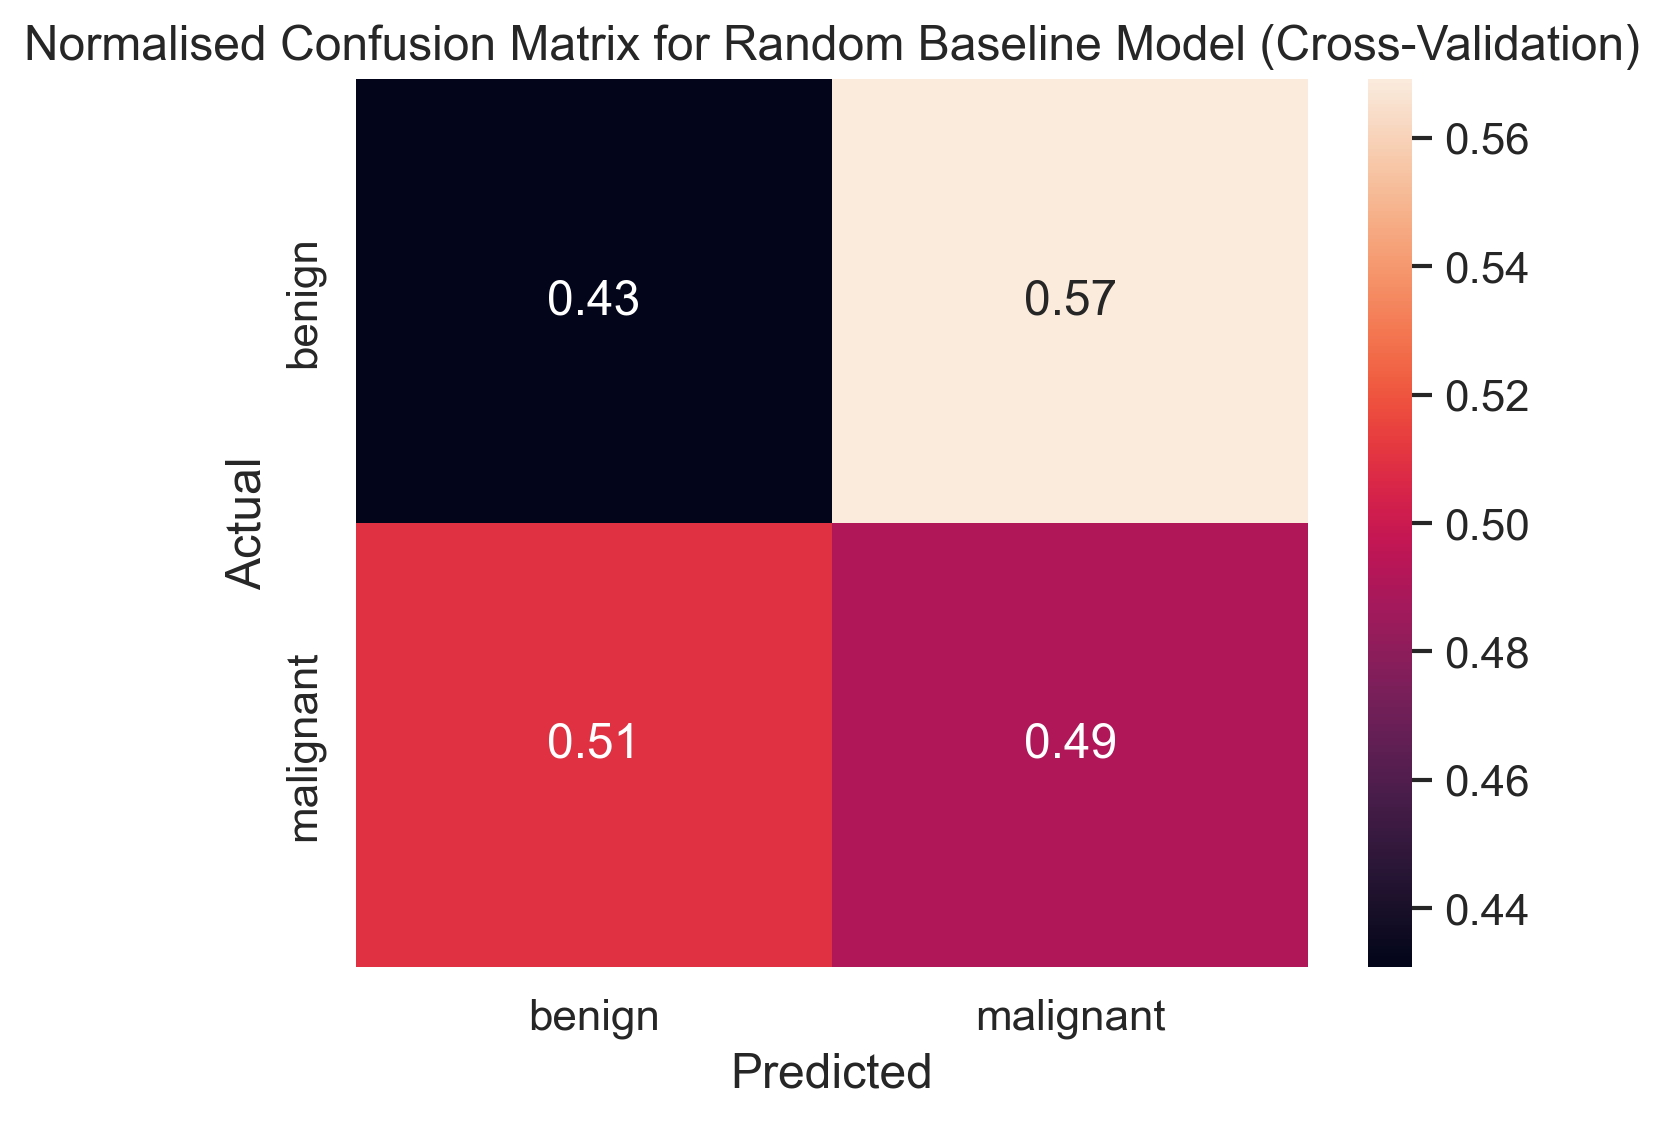

In [27]:
conf_matrix_baseline_cv = confusion_matrix(y_train_full, y_pred_random_cv, normalize="true")
sns.heatmap(conf_matrix_baseline_cv, annot=True, 
            xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalised Confusion Matrix for Random Baseline Model (Cross-Validation)')
plt.show()
# We cans see the ramdom baseline model has very bad performance.

#### Implement a baseline SGD classifier model

In [28]:
# Create full pipeline including preprocessing and model
sgd_model = Pipeline([
    ('preprocessing', num_pipeline),
    ('sgd', SGDClassifier(random_state=22))
])

# Use the same cross validation for all models to keep the consistency
# Use the cross validation for SGD baseline model
y_pred_sgd_cv = cross_val_predict(sgd_model, X_train_full, y_train_full, cv=skf)

#### Display the SGD classifier model's performance metrics and confusion matrix

In [29]:
# Measure the performance of the SGD classifier with the following metrics
accuracy_sgd_cv = accuracy_score(y_train_full, y_pred_sgd_cv)
balanced_accuracy_sgd_cv = balanced_accuracy_score(y_train_full, y_pred_sgd_cv)
recall_sgd_cv = recall_score(y_train_full, y_pred_sgd_cv, pos_label=1)
precision_sgd_cv = precision_score(y_train_full, y_pred_sgd_cv, pos_label=1)
auc_sgd_cv = roc_auc_score(y_train_full, y_pred_sgd_cv)
f1_sgd_cv = f1_score(y_train_full, y_pred_sgd_cv, pos_label=1)
f10_sgd_cv = f10_score(y_train_full, y_pred_sgd_cv)
f01_sgd_cv = f01_score(y_train_full, y_pred_sgd_cv)

print("SGD Classifier Performance:")
print(f"Accuracy: {accuracy_sgd_cv:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy_sgd_cv:.3f}")
print(f"Recall: {recall_sgd_cv:.3f}")
print(f"Precision: {precision_sgd_cv:.3f}")
print(f"AUC: {auc_sgd_cv:.3f}")
print(f"F1 Score: {f1_sgd_cv:.3f}")
print(f"F10 Score: {f10_sgd_cv:.3f}")
print(f"F01 Score: {f01_sgd_cv:.3f}")

SGD Classifier Performance:
Accuracy: 0.943
Balanced Accuracy: 0.938
Recall: 0.925
Precision: 0.891
AUC: 0.938
F1 Score: 0.907
F10 Score: 0.924
F01 Score: 0.891


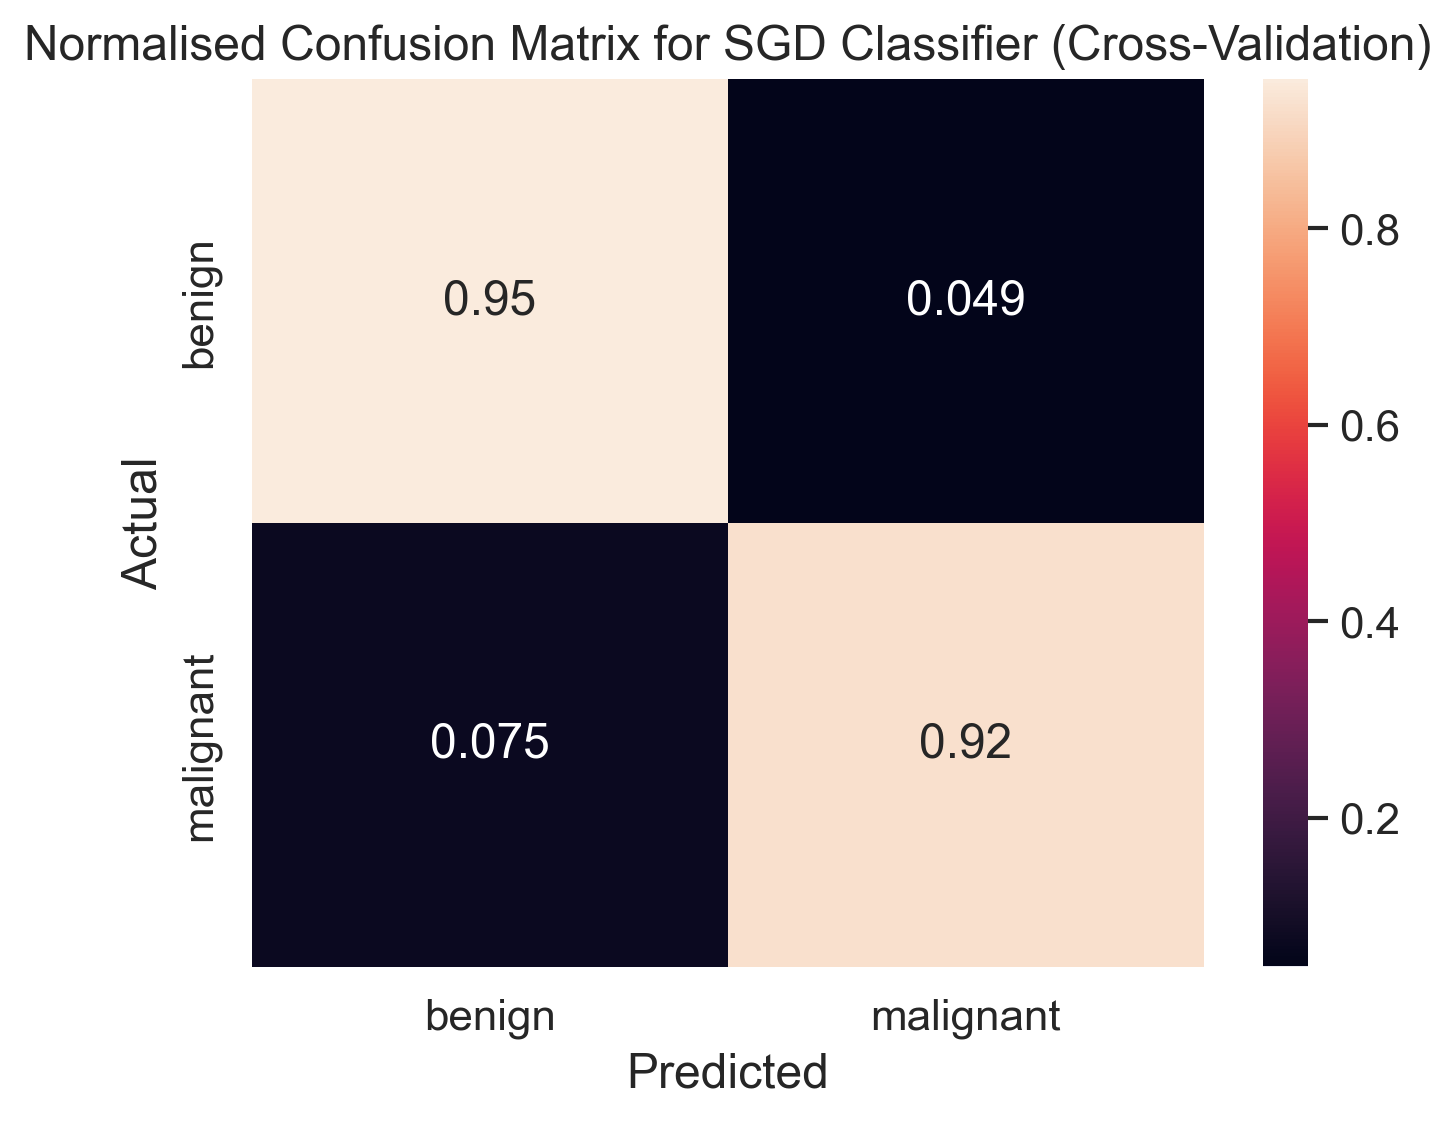

In [30]:
conf_matrix_sgd_cv = confusion_matrix(y_train_full, y_pred_sgd_cv, normalize="true")
sns.heatmap(conf_matrix_sgd_cv, annot=True,
           xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalised Confusion Matrix for SGD Classifier (Cross-Validation)')
plt.show()
# We cans see the baseline SGD classifier model performs much better than the ramdom model.

## 3. Model Optimisation

### 3.1 Performance metric
I choose `auc`. It integrates `TPR` (= sensitivity) and `FPR` (= 1-specificity) which satisfy two requirements of clients.  When sensitivity increases and FPR decreases, auc will increase. So we can choose the best model by identifying the highest auc value.

### 3.2 Hyper-parameter optimisation

#### Hyper-parameter optimisation for SGD Classifer, SVM and Decision Tree

Best Parameters for SGD Classifier: {'classifier__alpha': 1e-07, 'classifier__loss': 'log_loss', 'classifier__penalty': 'l2'}

Performance Metrics for Best SGD Classifier model:
Accuracy: 0.955
Balanced Accuracy: 0.946
Recall: 0.925
Precision: 0.925
AUC: 0.977
F1 Score: 0.925
F10 Score: 0.925
F01 Score: 0.925
True Positive Rate: 0.925
False Positive Rate: 0.033


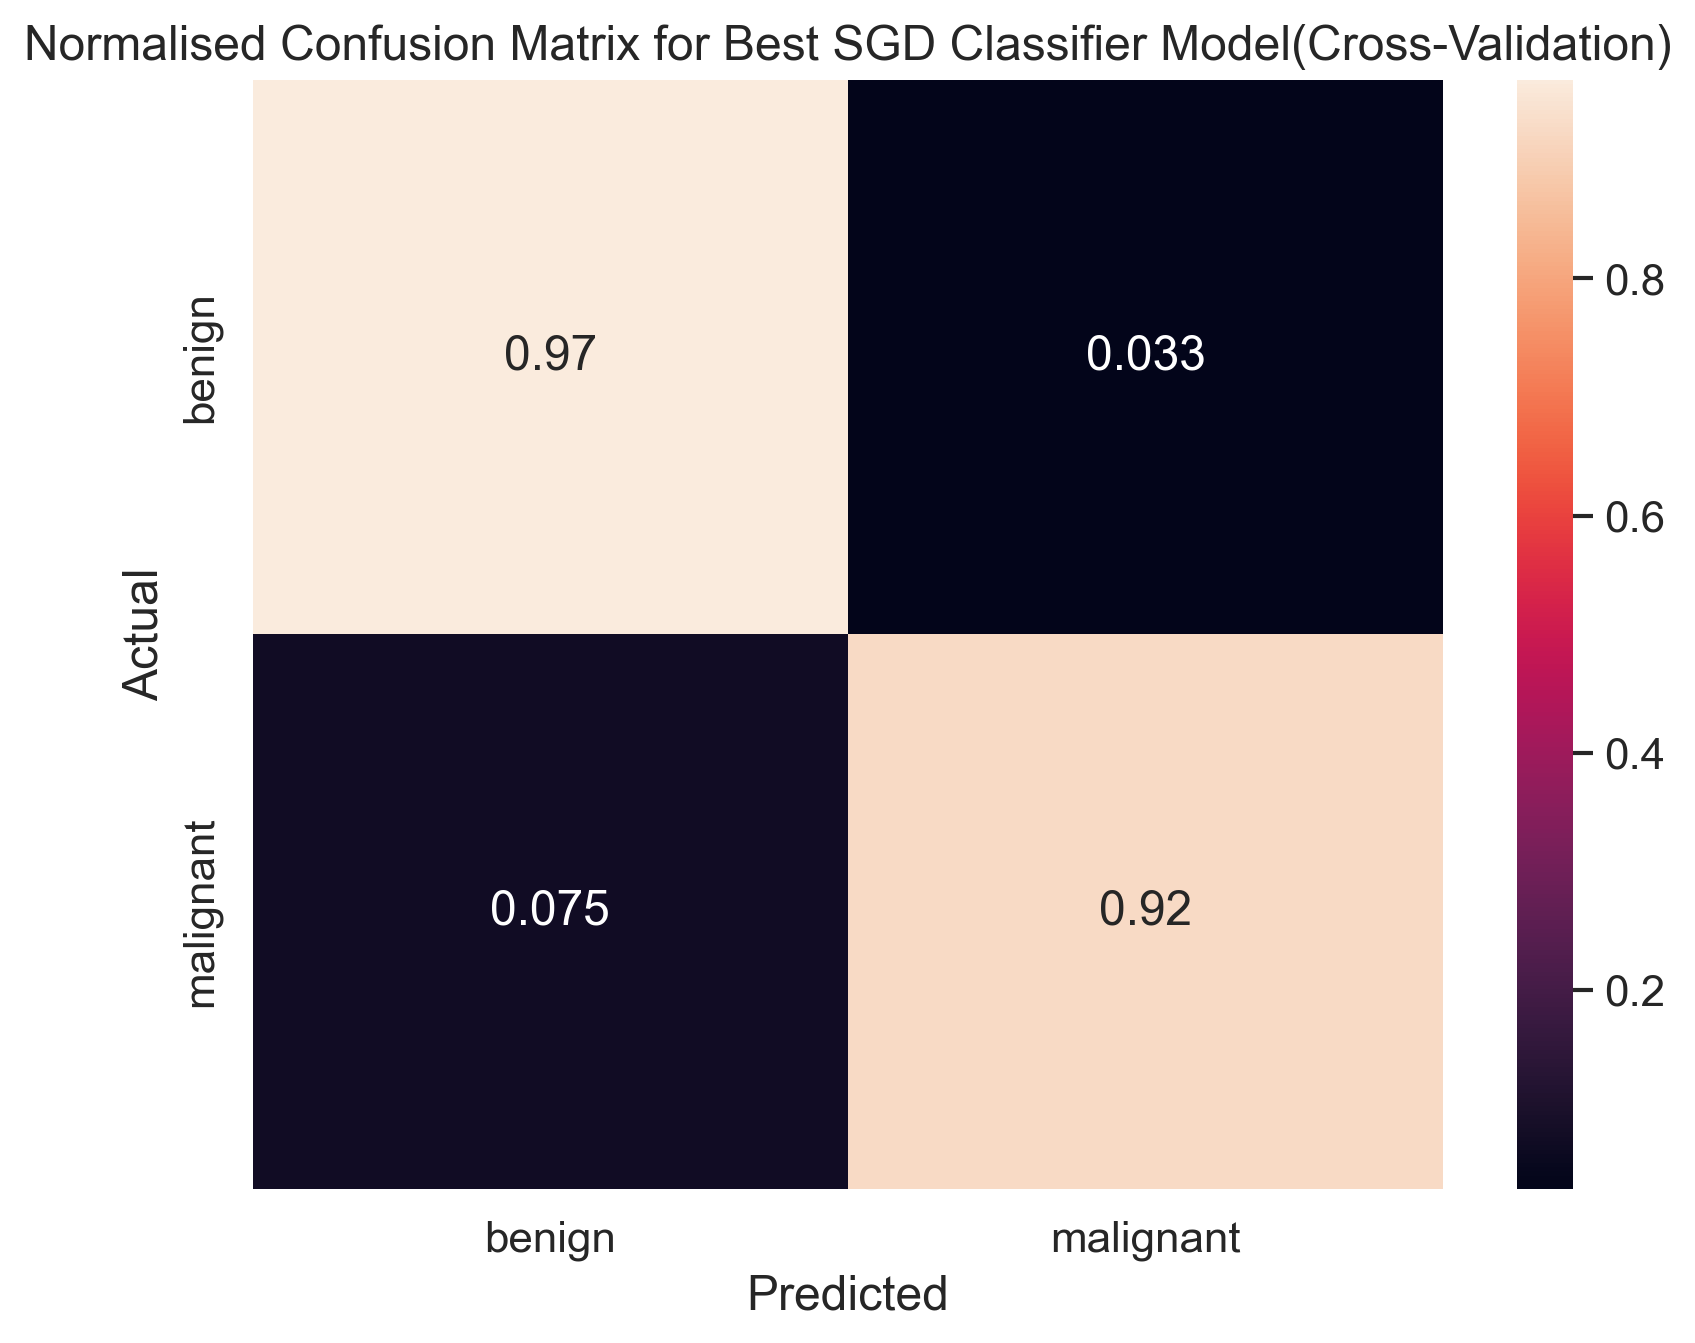

Best Parameters for SVM: {'classifier__C': 1000, 'classifier__degree': 2, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Performance Metrics for Best SVM model:
Accuracy: 0.949
Balanced Accuracy: 0.937
Recall: 0.906
Precision: 0.923
AUC: 0.989
F1 Score: 0.914
F10 Score: 0.906
F01 Score: 0.923
True Positive Rate: 0.906
False Positive Rate: 0.033


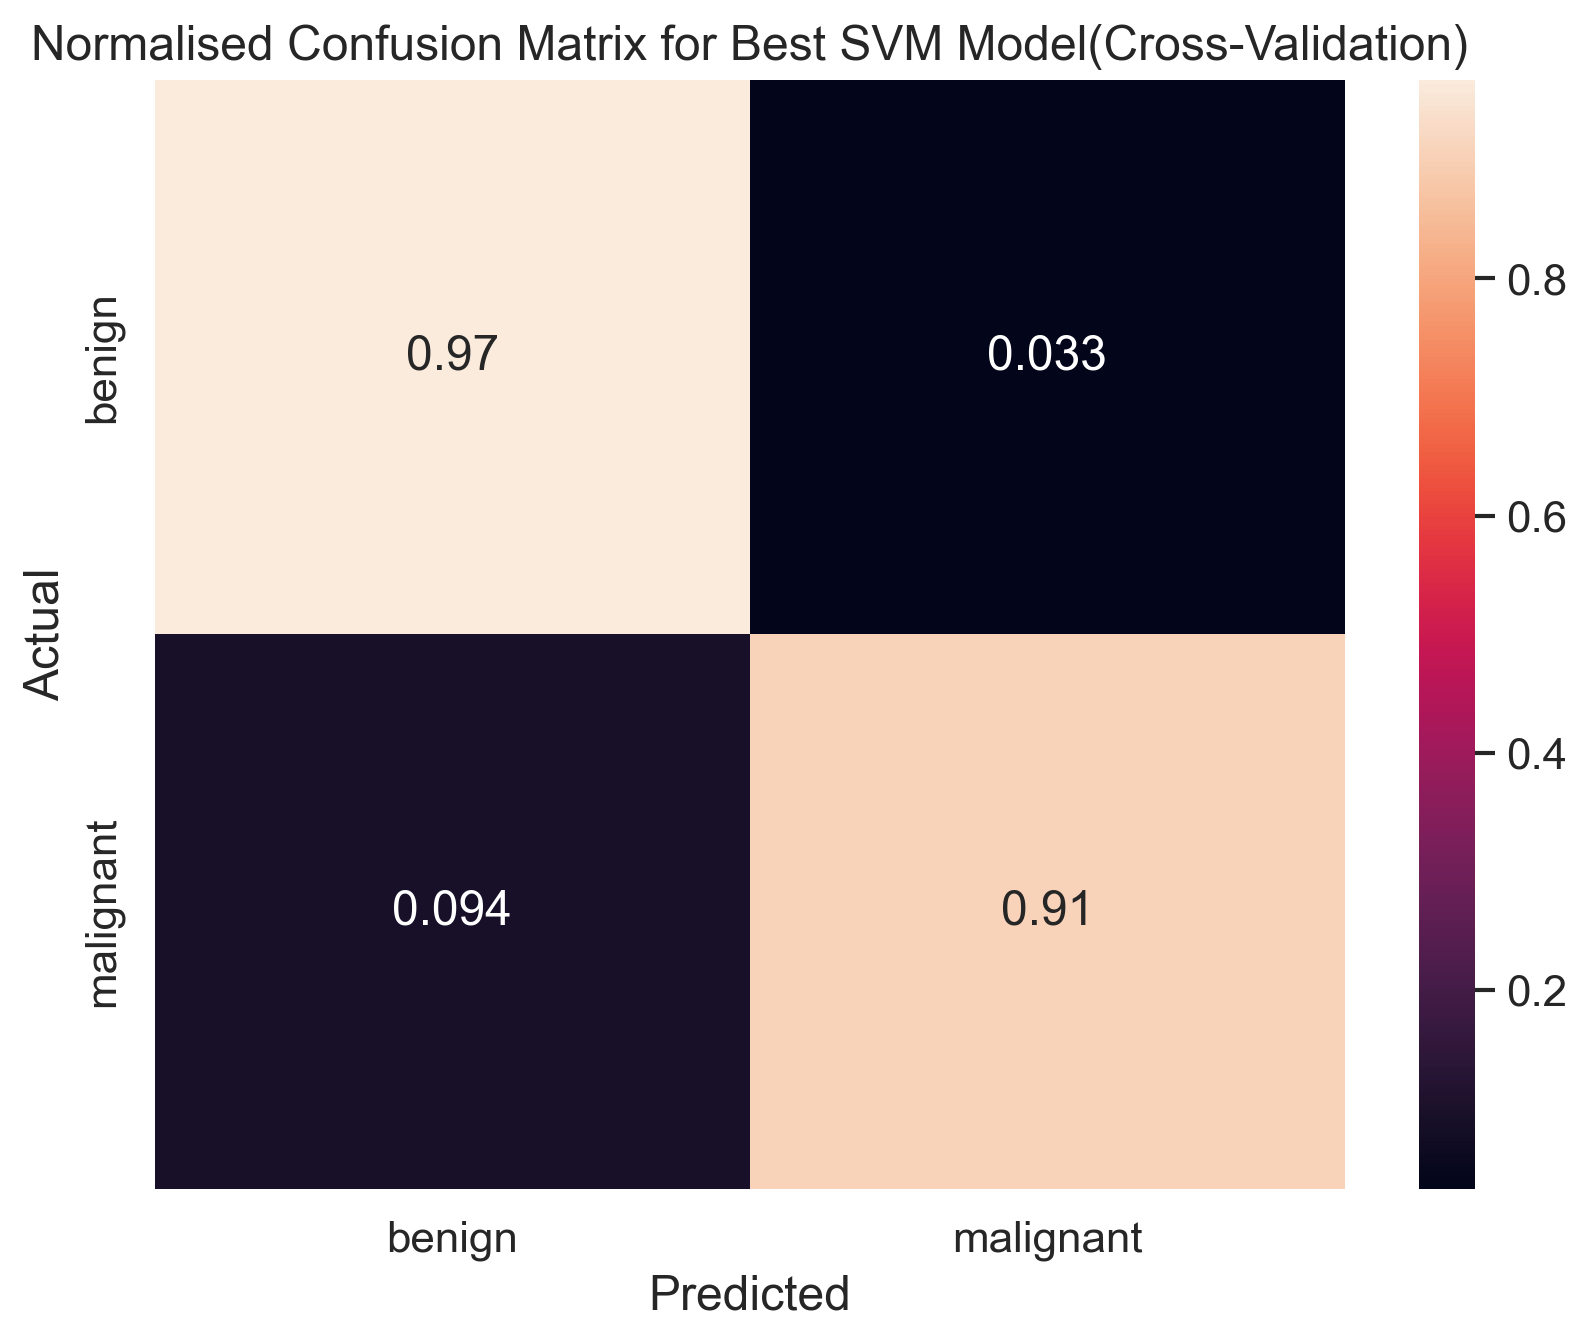

Best Parameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 0.1, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}

Performance Metrics for Best Decision Tree model:
Accuracy: 0.886
Balanced Accuracy: 0.838
Recall: 0.717
Precision: 0.884
AUC: 0.962
F1 Score: 0.792
F10 Score: 0.718
F01 Score: 0.882
True Positive Rate: 0.717
False Positive Rate: 0.041


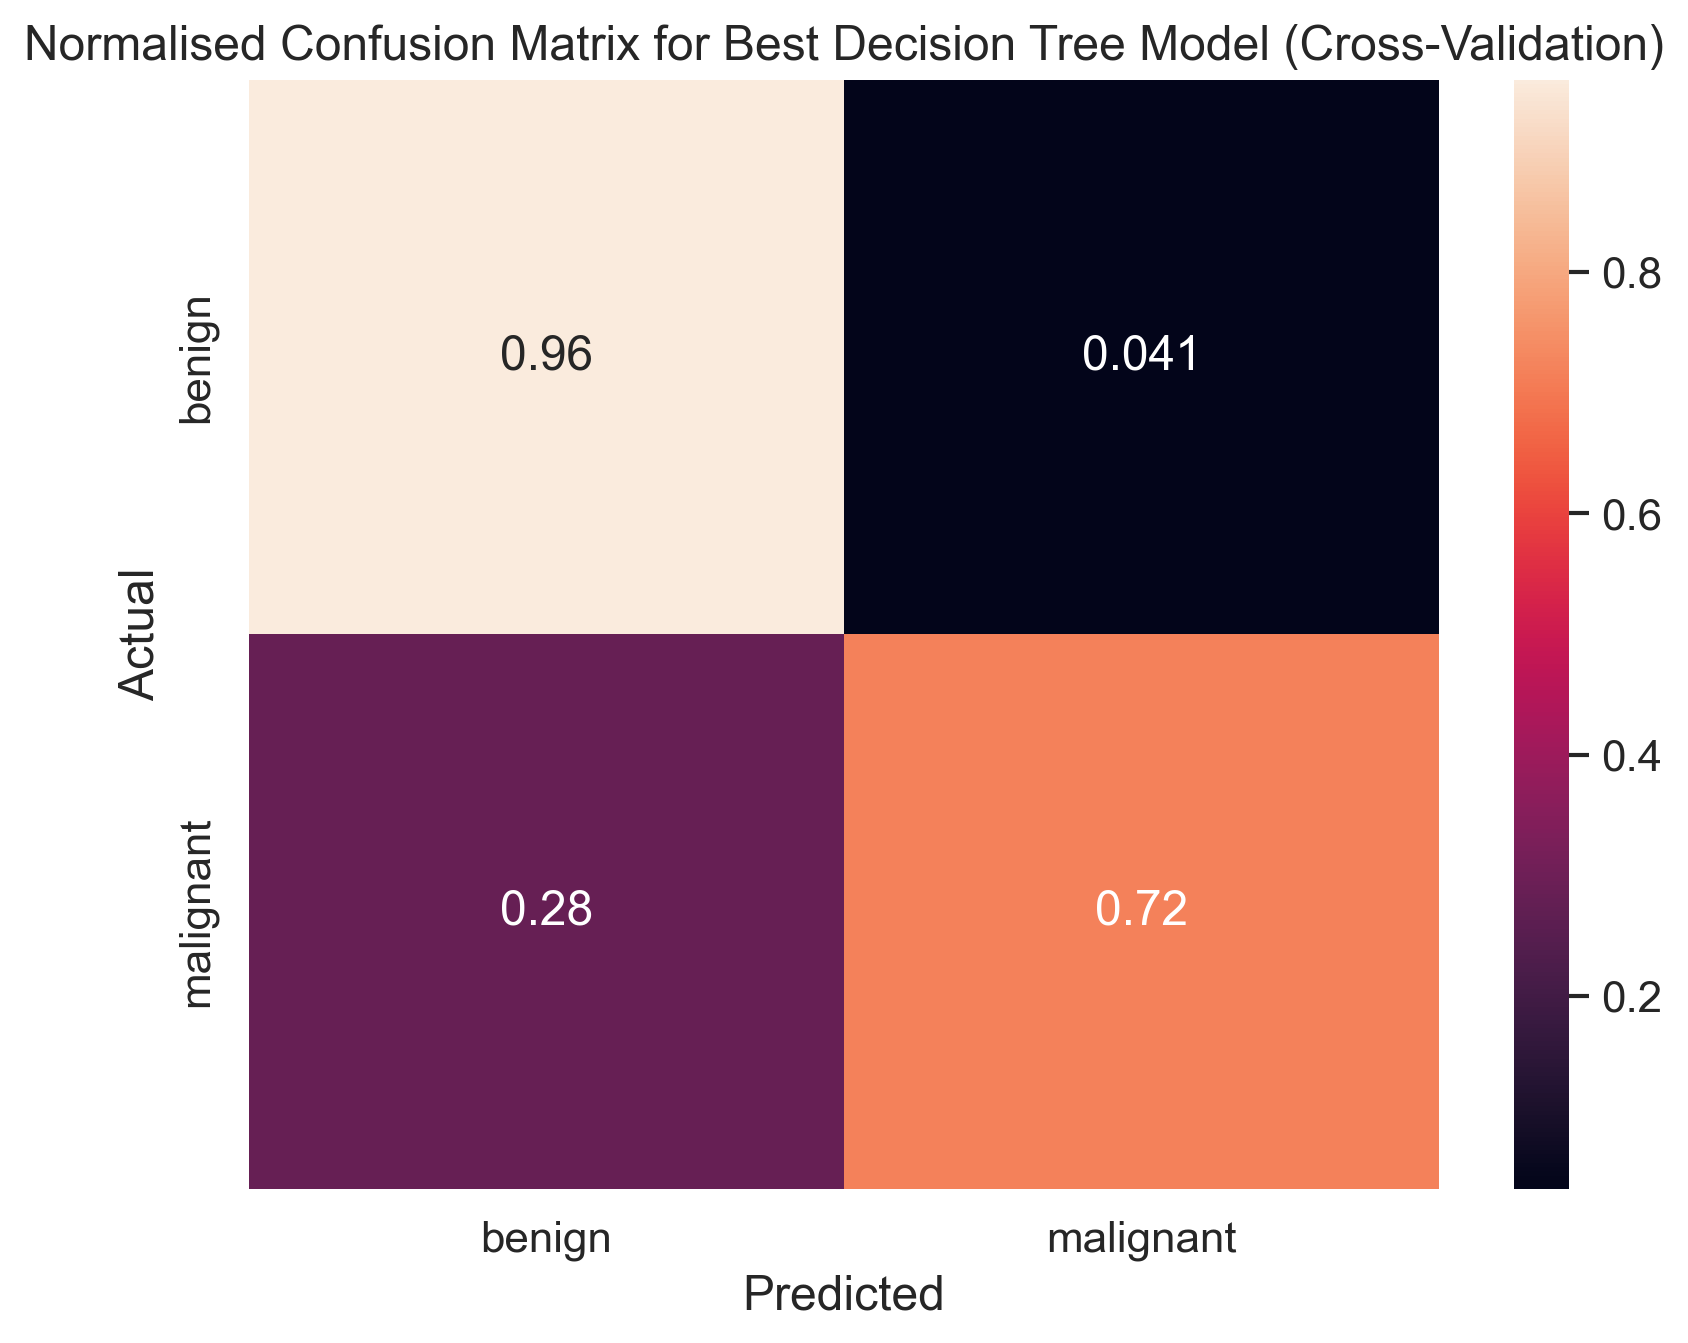

In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define 2 functions for simplicity and maintainability of my code
def calculate_and_print_metrics(y_true, y_pred, y_pred_proba, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred, normalize="true")
    tpr = conf_matrix[1,1]  # detecting malignant cancer when it is present
    fpr = conf_matrix[0,1]  # healthy cases labeled as malignant
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, pos_label=1)
    precision = precision_score(y_true, y_pred, pos_label=1)
    auc = roc_auc_score(y_true, y_pred_proba[:, 1])
    f1 = f1_score(y_true, y_pred, pos_label=1)
    f10 = fbeta_score(y_true, y_pred, beta=10, pos_label=1)
    f01 = fbeta_score(y_true, y_pred, beta=0.1, pos_label=1)

    print(f"\nPerformance Metrics for Best {model_name} model:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"F10 Score: {f10:.3f}")
    print(f"F01 Score: {f01:.3f}")
    print(f"True Positive Rate: {tpr:.3f}")
    print(f"False Positive Rate: {fpr:.3f}")

    return conf_matrix, auc, tpr, fpr

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True,
                xticklabels=['benign', 'malignant'], 
                yticklabels=['benign', 'malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Hyper-parameter optimisation for 3 models

# Create pipeline for 3 models
sgd_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('classifier', SGDClassifier(random_state=22))
])

svm_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('classifier', SVC(random_state=22, probability=True))
])

dt_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('classifier', DecisionTreeClassifier(random_state=22))
])

# Define GridSearchCV parameters for 3 models
param_grid_sgd = {
    'classifier__alpha': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__loss': ['log_loss', 'hinge', 'modified_huber']
} # as classifier__alpha of the best model is 1e-07, I add 1e-08 to see if need more parameters.

param_grid_svm = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], # # as classifier__C of the best model is 1000, I add 2000 to see if need more parameters.
    'classifier__kernel': ['linear', 'rbf', 'poly', "sigmoid"],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'classifier__degree': [2, 3, 4, 5, 6]  
}

param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 6, 8],
    'classifier__max_features': ['sqrt', 'log2', None, 0.1, 0.2, 0.5]
}

# Create GridSearchCV object for 3 models
# as the reason said in 3.1, I choose auc as the scoring here
grid_search_sgd = GridSearchCV(sgd_pipeline, param_grid_sgd, cv=skf, scoring='roc_auc', verbose=0)
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=skf, scoring='roc_auc', verbose=0)
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=skf, scoring='roc_auc', verbose=0)


# Fit GridSearchCV on training set
grid_search_sgd.fit(X_train_full, y_train_full)
grid_search_svm.fit(X_train_full, y_train_full)
grid_search_dt.fit(X_train_full, y_train_full)

# Get the best model from GridSearchCV
best_sgd_model = grid_search_sgd.best_estimator_
best_sgd_params = grid_search_sgd.best_params_

best_svm_model = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_

best_dt_model = grid_search_dt.best_estimator_
best_dt_params = grid_search_dt.best_params_


# Perform cross-validation prediction
# as our dataset is small, cross-validation will provide more stable results than a single validation set
cv_results_sgd = cross_val_predict(best_sgd_model, X_train_full, y_train_full, cv=skf, method='predict')
cv_proba_sgd = cross_val_predict(best_sgd_model, X_train_full, y_train_full, cv=skf, method='predict_proba') # use probability for auc calculation

cv_results_svm = cross_val_predict(best_svm_model, X_train_full, y_train_full, cv=skf)
cv_proba_svm = cross_val_predict(best_svm_model, X_train_full, y_train_full, cv=skf, method='predict_proba')

cv_results_dt = cross_val_predict(best_dt_model, X_train_full, y_train_full, cv=skf)
cv_proba_dt = cross_val_predict(best_dt_model, X_train_full, y_train_full, cv=skf, method='predict_proba')

# Print best model, results and confusion matrix
print(f"Best Parameters for SGD Classifier: {best_sgd_params}")
conf_matrix_sgd, auc_sgd, tpr_sgd, fpr_sgd = calculate_and_print_metrics(y_train_full, cv_results_sgd, cv_proba_sgd, "SGD Classifier")
plot_confusion_matrix(conf_matrix_sgd, 'Normalised Confusion Matrix for Best SGD Classifier Model(Cross-Validation)')

print(f"Best Parameters for SVM: {best_svm_params}")
conf_matrix_svm, auc_svm, tpr_svm, fpr_svm = calculate_and_print_metrics(y_train_full, cv_results_svm, cv_proba_svm, "SVM")
plot_confusion_matrix(conf_matrix_svm, 'Normalised Confusion Matrix for Best SVM Model(Cross-Validation)')

print(f"Best Parameters for Decision Tree: {best_dt_params}")
conf_matrix_dt, auc_dt, tpr_dt, fpr_dt = calculate_and_print_metrics(y_train_full, cv_results_dt, cv_proba_dt, "Decision Tree")
plot_confusion_matrix(conf_matrix_dt, 'Normalised Confusion Matrix for Best Decision Tree Model (Cross-Validation)') 

#### Choose the best model

In [32]:
# From the results above, we can find that the best SGD Classifier performs model better than 
# the random baseline model and baseline SGD Classifier model. 
# So we will keep the best one to compare with other models.

# Check the auc performance 
print(f"\nModel Comparison:")
print(f"AUC for SGD Classifier: {auc_sgd:.3f}")
print(f"AUC for SVM: {auc_svm:.3f}")
print(f"AUC for Decision Tree: {auc_dt:.3f}")
print('\n')

# also check the client requirements:
print(f"TPR for SGD Classifier: {tpr_sgd:.3f}")
print(f"TPR for SVM: {tpr_svm:.3f}")
print(f"TPR for Decision Tree: {tpr_dt:.3f}")
print('\n')
print(f"FPR for SGD Classifier: {fpr_sgd:.3f}")
print(f"FPR for SVM: {fpr_svm:.3f}")
print(f"FPR for Decision Tree: {fpr_dt:.3f}")


Model Comparison:
AUC for SGD Classifier: 0.977
AUC for SVM: 0.989
AUC for Decision Tree: 0.962


TPR for SGD Classifier: 0.925
TPR for SVM: 0.906
TPR for Decision Tree: 0.717


FPR for SGD Classifier: 0.033
FPR for SVM: 0.033
FPR for Decision Tree: 0.041


In [33]:
# By comparing 3 metrics, I mannually choose SGD as the best model. 
# Because it has the highest TPR and lowest FPR and meets clients requirements: TPR=0.925 > 0.9, FPR=0.033 < 0.2.
# only slightly lags behind SVM in auc(the metric I choose for balance TPR and TPR), 
# but the client requirements are the most important. 
 
best_model_name = 'SGD Classifier'
best_model_params = best_sgd_params
best_model = best_sgd_model
    
print(f"\nBest model based on TPR and FPR is {best_model_name}: {best_model_params}")


Best model based on TPR and FPR is SGD Classifier: {'classifier__alpha': 1e-07, 'classifier__loss': 'log_loss', 'classifier__penalty': 'l2'}


#### Display the final results of the best model


Performance Metrics for Best Best Model (SGD Classifier) on test set model:
Accuracy: 0.955
Balanced Accuracy: 0.945
Recall: 0.923
Precision: 0.923
AUC: 0.980
F1 Score: 0.923
F10 Score: 0.923
F01 Score: 0.923
True Positive Rate: 0.923
False Positive Rate: 0.032


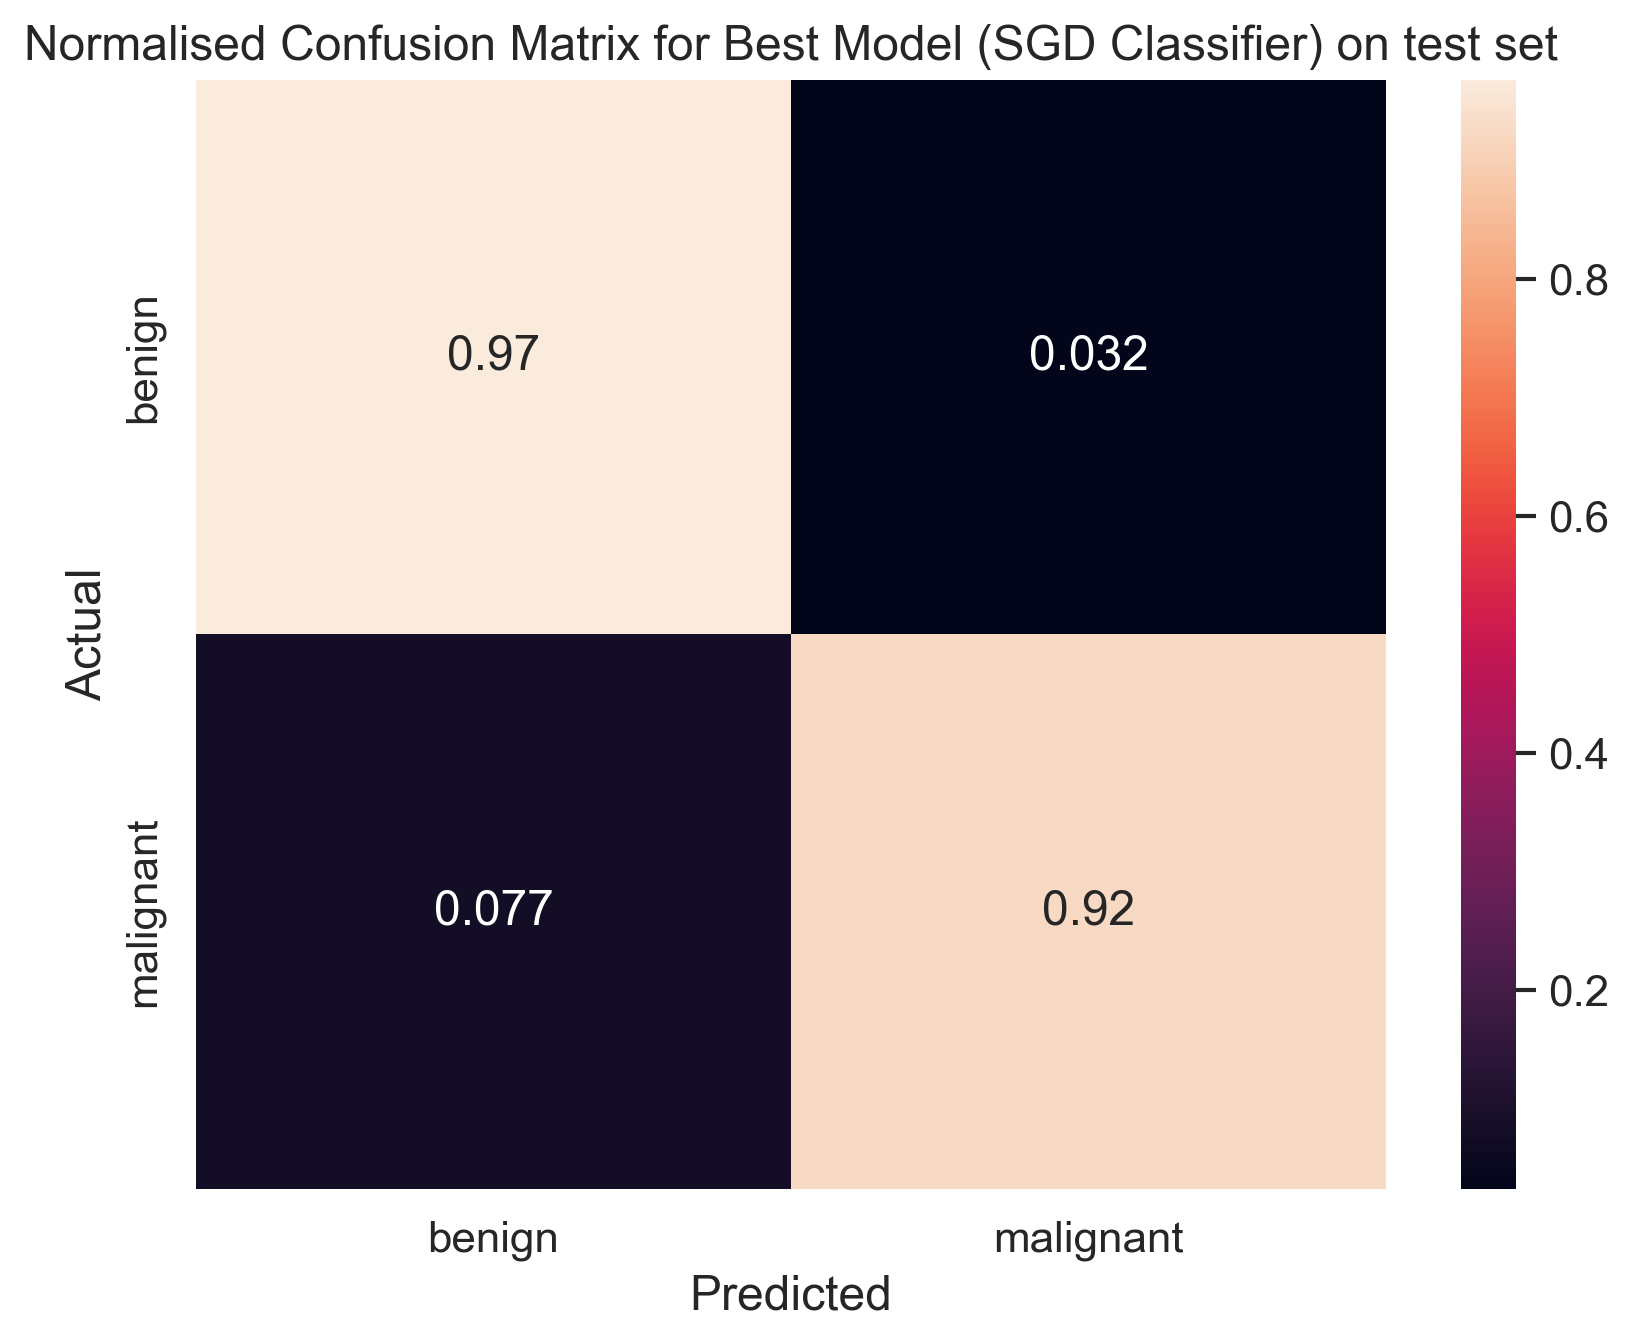

In [34]:
# Since we already choose the best model and it's performance of cross validation meets the client requirements,
# it's time to check it performance on test set.

# Retrain the best model on the full training set
best_model.fit(X_train_full, y_train_full)

# Predict using the best model on the test set
X_test_df = pd.DataFrame(X_test, columns=feature_names)
y_pred_best = best_model.predict(X_test_df)
y_pred_proba_best = best_model.predict_proba(X_test_df)

# Final results
conf_matrix_best, auc_best, tpr_best, fpr_best = calculate_and_print_metrics(
    y_test, y_pred_best, y_pred_proba_best, f"Best Model ({best_model_name}) on test set"
)
plot_confusion_matrix(conf_matrix_best, f'Normalised Confusion Matrix for Best Model ({best_model_name}) on test set')

# The best model perform well on the test set and meets the client requirements: TPR=0.923 > 0.9, FPR=0.032 < 0.2

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [35]:
# P(pred_0|true_1) = P(pred_0 ∩ true_1)/P(true_1) = FN(False Negative)/FN+TP(True Positive)

# Extract FN and TP from normalised confusion matrix
FN_best = conf_matrix_best[1, 0]  # FN is when actual is 'malignant' and predicted is 'benign'
TP_best = conf_matrix_best[1, 1] # TP is when actual is 'malignant' and predicted is 'malignant'
# Calculate FNR (False Negative Rate)
prob = FN_best / (FN_best + TP_best)  

# Print FNR
print(f"\nThe probability that a sample from a person with a malignant tumour is given a result that they do not have cancer for the best model is {prob:.4f}")


The probability that a sample from a person with a malignant tumour is given a result that they do not have cancer for the best model is 0.0769


## 4. Decision Boundaries
 To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
The client also wants to know if your method has met their performance specifications.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [36]:
# Use median to impute NA 
feature_names = X_train_full.columns
imputer = SimpleImputer(strategy='median')
X_train_full_imputed = pd.DataFrame(imputer.fit_transform(X_train_full), columns=feature_names, index=X_train_full.index)

In [37]:
def calculate_t_score(feature, labels):
    x1 = feature[labels == 0]
    x2 = feature[labels == 1]
    t_score = (np.mean(x2) - np.mean(x1)) / (0.5 * (np.std(x2) + np.std(x1)))
    return abs(t_score)

t_scores = {}

# Use the training set to ensure consistency with the data used for model training
for feature in feature_names:
    t_scores[feature] = calculate_t_score(X_train_full_imputed[feature], y_train_full)

# Sort features by T-score in descending order
sorted_features = sorted(t_scores.items(), key=lambda x: x[1], reverse=True)
best_features = []

print("Best 4 features according to T-score:")
for feature, score in sorted_features[:4]:
    best_features.append(feature)

print(best_features)

Best 4 features according to T-score:
['mean concave points', 'mean perimeter', 'area error', 'mean radius']


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

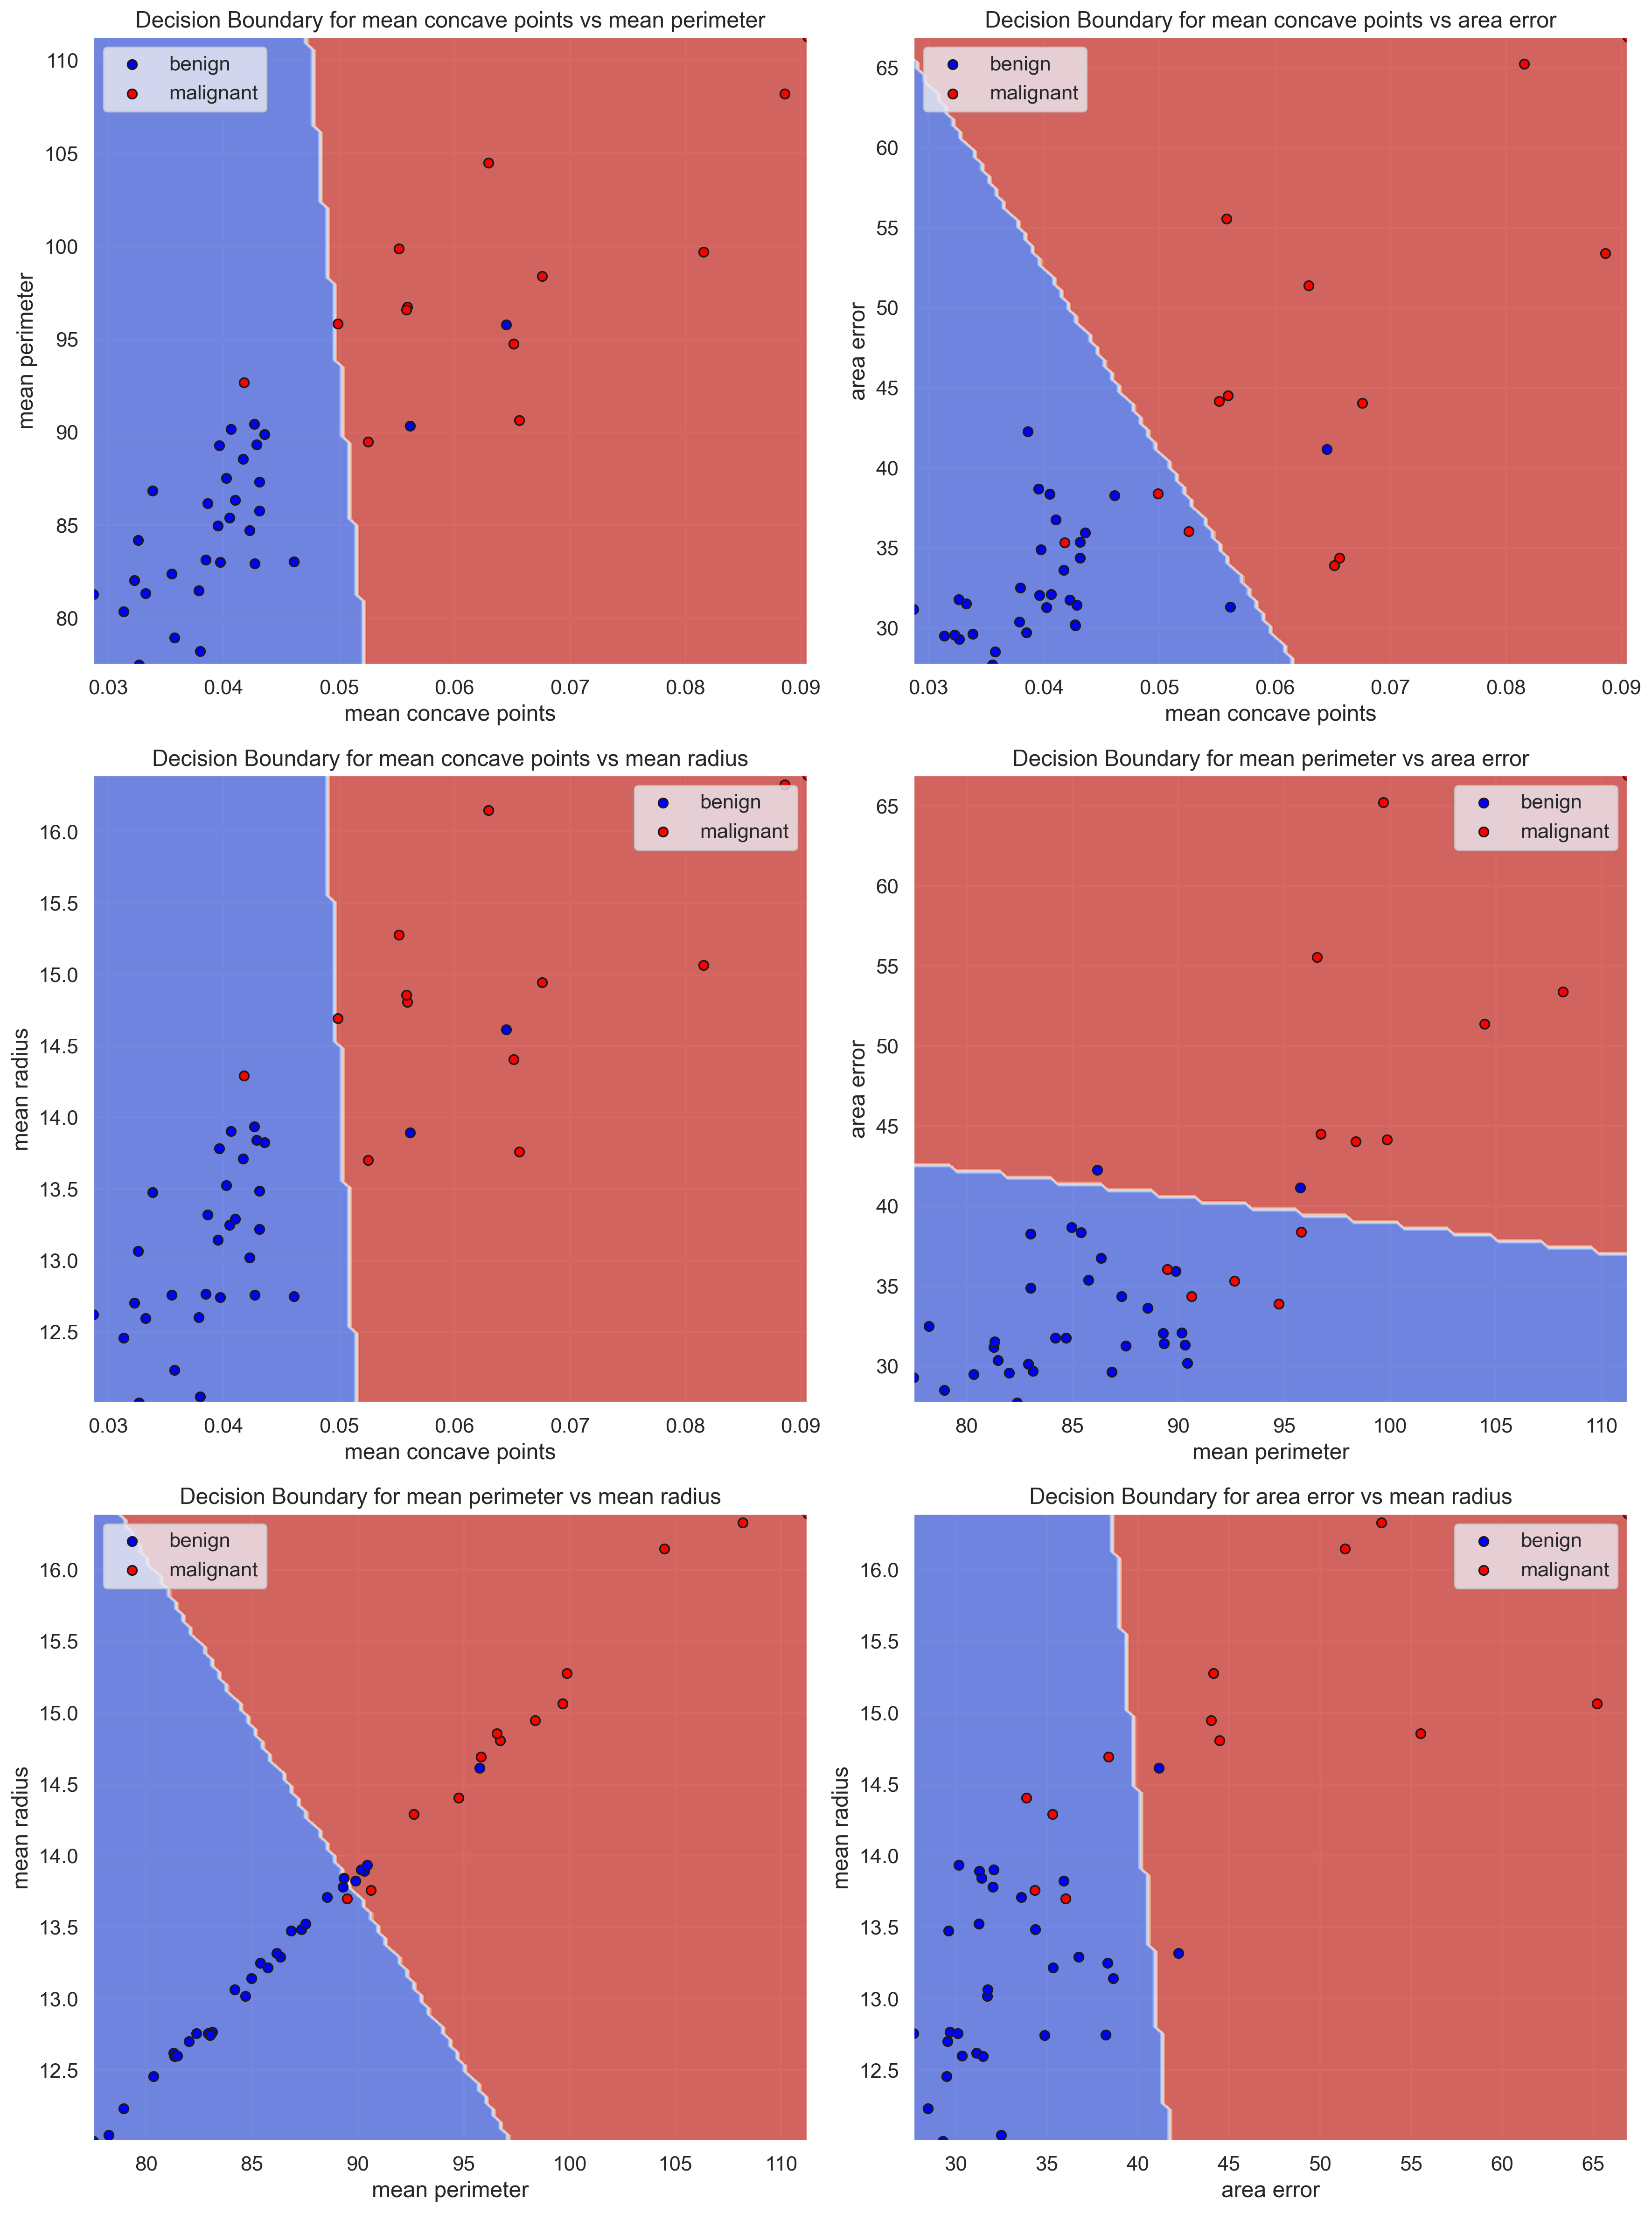

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from itertools import combinations

# Exact all features
all_features = X_train_full.columns.tolist()

# Function to calculate the balanced mean point
def calculate_balanced_mean(class0, class1, features):
    return 0.5 * (class0[features].mean().values + class1[features].mean().values)

# Create a 2x3 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()

# Calculate the mean point
class0 = X_train_full[y_train_full == 0]
class1 = X_train_full[y_train_full == 1]
xmean = calculate_balanced_mean(class0, class1, all_features)

# Merge y_test into X_test
X_test_full = X_test.copy()
X_test_full['label'] = y_test

# Define all feature pair combinations
feature_pairs = list(combinations(best_features, 2))

# Create a mesh grid
def make_meshgrid(x, y, ns=100):
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, ns), np.linspace(y_min, y_max, ns))
    return xx, yy

# Plot decision boundaries
for i, (feature1, feature2) in enumerate(feature_pairs):
    ax = axes[i]
    
    # Use the test set to generate mesh grid (As we use cross-validation for training set above, no sepereted validation set.)
    xx, yy = make_meshgrid(X_test[feature1], X_test[feature2])
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_data_df = pd.DataFrame(mesh_data, columns=[feature1, feature2])
    
    # Fix other feature values to their means
    for feature in all_features:
        if feature not in [feature1, feature2]:
            mesh_data_df[feature] = xmean[all_features.index(feature)]
    
    try:
        # Use the trained best model to predict classes for mesh grid points
        Z = best_model.predict(mesh_data_df[all_features])
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary on the current subplot
        out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        
        # Plot test data points
        X_class0 = X_test_full[X_test_full['label'] == 0]
        X_class1 = X_test_full[X_test_full['label'] == 1]
        # malignant: Class 1, benign: Class 0
        ax.scatter(X_class0[feature1], X_class0[feature2], c='blue', label='benign', edgecolors='k')
        ax.scatter(X_class1[feature1], X_class1[feature2], c='red', label='malignant', edgecolors='k')
        
        # Add legend labels
        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        ax.set_title(f'Decision Boundary for {feature1} vs {feature2}')
        ax.legend()
    except KeyError as e:
        print(f"KeyError: {e}")
        print("Error with the following mesh data dataframe:")
        print(mesh_data_df)
        raise

# Adjust subplot layout
plt.tight_layout()
plt.show()

### 4.3 Performance specification
We use the best model on test set and get the results above. We can see that TPR is 0.923 > 0.9 and FPR is 0.032 < 0.2, so the model meets the client's performance specifications.

In [39]:
print(f"\nRequired Metrics for {best_model_name} on Test Set:")
print(f"True Positive Rate: {tpr_best:.3f}")
print(f"False Positive Rate: {fpr_best:.3f}")

# Check if the model meets the requirements
if tpr_best > 0.9 and fpr_best < 0.2:
    print("The model meets the client's performance specifications.")
else:
    print("The model does not meet the client's performance specifications.")


Required Metrics for SGD Classifier on Test Set:
True Positive Rate: 0.923
False Positive Rate: 0.032
The model meets the client's performance specifications.
